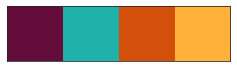

In [4]:
# Supporting both python 2 and python 3.
from __future__ import division, print_function, unicode_literals

#importing neccessary libraries.
import numpy as np
import os
import pandas as pd

#Importing matplotlib.
#matplotlib is a visualization library in Python for 2D plots of arrays.
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Importing Seabron.
#Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.
import seaborn as sns
sns.set_style('white')

#Defining custom palette.
customPalette = ['#630C3A', '#20B2AA', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


In [6]:
# Import my spotify data.
songs = pd.read_csv(r"C:\Users\saima\Desktop\Predicting Mood Using My Spotify Playist Data\spotify.csv")

songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        100 non-null    int64  
 1   name              100 non-null    object 
 2   album             100 non-null    object 
 3   artist            100 non-null    object 
 4   release_date      100 non-null    object 
 5   length            100 non-null    int64  
 6   popularity        100 non-null    int64  
 7   danceability      100 non-null    float64
 8   acousticness      100 non-null    float64
 9   danceability.1    100 non-null    float64
 10  energy            100 non-null    float64
 11  instrumentalness  100 non-null    float64
 12  liveness          100 non-null    float64
 13  loudness          100 non-null    float64
 14  speechiness       100 non-null    float64
 15  tempo             100 non-null    float64
 16  time_signature    100 non-null    int64  
dty

In [7]:
#Dropping unneccessary columns/data
songs = songs.drop(['Unnamed: 0','album','energy','release_date','tempo','length','popularity','danceability.1','instrumentalness','time_signature'],axis=1)
songs.head()

,name,artist,danceability,acousticness,liveness,loudness,speechiness
0,I Will Always Love You,Whitney Houston,0.306,0.8440,0.0839,-12.518,0.0356
1,Love of the Common People,Paul Young,0.744,0.0883,0.0599,-11.202,0.0758
2,Because I Love You,Shakin' Stevens,0.587,0.2440,0.1180,-12.891,0.0255
3,Song For Zula,Phosphorescent,0.492,0.7290,0.0509,-8.260,0.0349
4,Song for Zula,Ronnie Fauss,0.506,0.7340,0.0737,-6.931,0.0246


In [8]:
#Describing numerical features.
songs.describe()

,danceability,acousticness,liveness,loudness,speechiness
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.625380,0.298293,0.170778,-7.264860,0.081449
std,0.153444,0.328817,0.112697,4.239447,0.071516
min,0.157000,0.000688,0.050900,-23.562000,0.024600
25%,0.558500,0.040075,0.093475,-8.034000,0.036600
50%,0.660000,0.169500,0.124000,-6.004500,0.054150
75%,0.728250,0.535250,0.217500,-4.784000,0.091025
max,0.903000,0.990000,0.638000,-2.528000,0.375000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CE56004F0>,
      dtype=object)

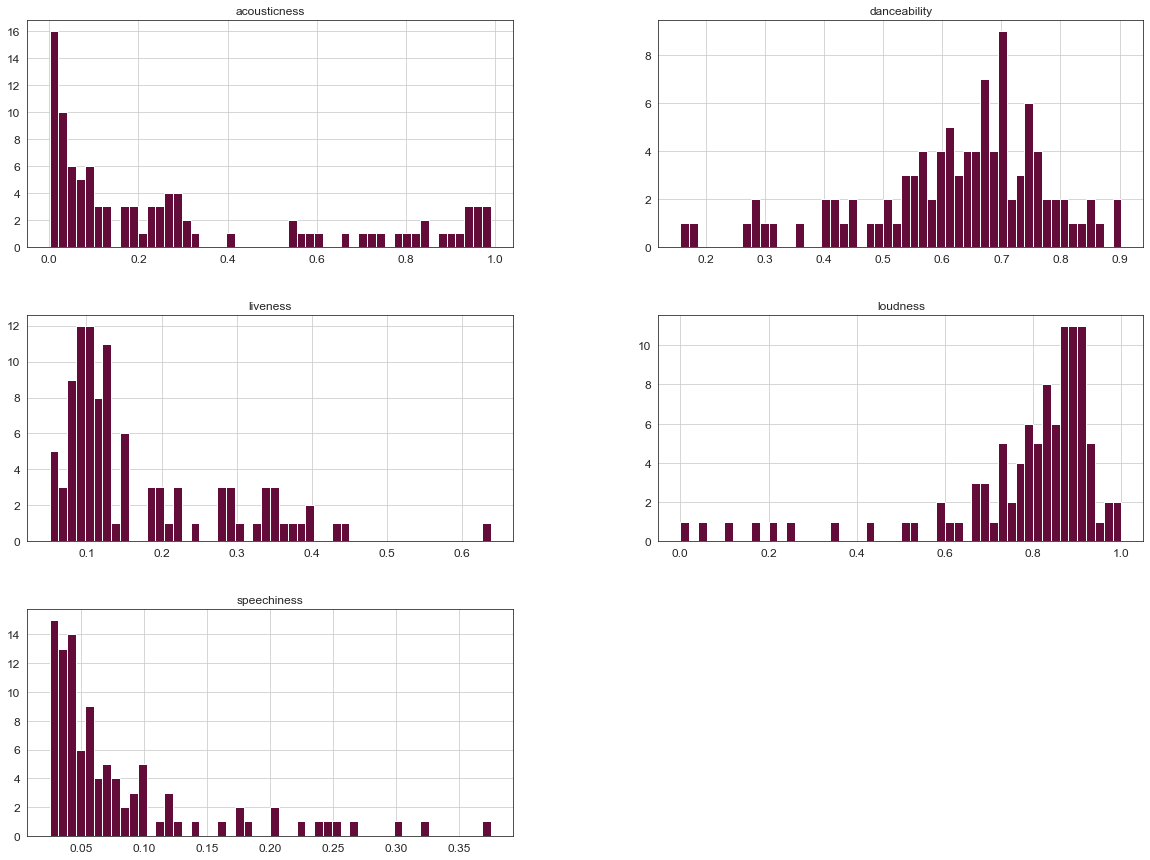

In [9]:
#Importing preprocessing from sklearn.
#The sklearn.preprocessing package provides several common utility functions and transformer classes.
from sklearn import preprocessing

#Normalising loudness value between 0 to 1.
loudness = songs[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)

#plotting histogram for different features we selected.
songs.hist(bins=50,figsize=(20,15))

In [10]:
#Dropping song names and artist before clustering.
songs_features = songs.copy()
songs_features = songs_features.drop(['name','artist'],axis=1)

*Now the Data is Prepared, will now cluster the songs and identify a mood represented by each cluster.*

# K-Means Clustering Algorithm

*Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data. In clustering, we do not have a target to predict. We look at the data and then try to club similar observations and form different groups. Hence it is an unsupervised learning problem.
Using K-Means Clustering Algorithm, we can group data points into k-groups and discover emphazing patterns. To execute that it looks for a predefined number (k) of clusters. There are many ways of doing, One of the best method is the ELBOW METHOD.
The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters.*

In [11]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel = kmeanModel.fit(songs_features)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

In [12]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.587199598360731)
For n_clusters = 3, silhouette score is 0.5430140962106473)
For n_clusters = 4, silhouette score is 0.31972683321454126)
For n_clusters = 5, silhouette score is 0.2778193856962768)
For n_clusters = 6, silhouette score is 0.25576070524716277)
For n_clusters = 7, silhouette score is 0.27516894762996097)
For n_clusters = 8, silhouette score is 0.2631977667869098)
For n_clusters = 9, silhouette score is 0.2760471085521318)
For n_clusters = 10, silhouette score is 0.2868555335348731)
For n_clusters = 11, silhouette score is 0.28732897221284165)
For n_clusters = 12, silhouette score is 0.27090069364300823)
For n_clusters = 13, silhouette score is 0.2906699517120777)
For n_clusters = 14, silhouette score is 0.295228245747085)


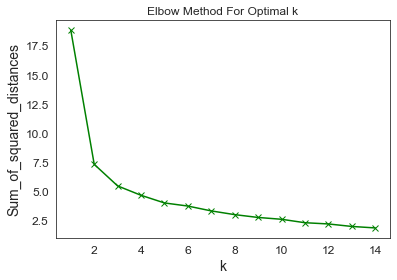

In [13]:
#Plotting graphs for Optimal k
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**It' visible now, when k = 4 the average squared distance to cluster centre starts to trail off remarkably. This is, our optimal k.**

In [14]:
#Making Clusters using sklearn.cluster.Kmeans
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(n_clusters=4, n_jobs=None, precompute_distances='auto')

In [15]:
#Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability, for visualisation.
from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters=4)
kmeans.fit(songs_features)
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)

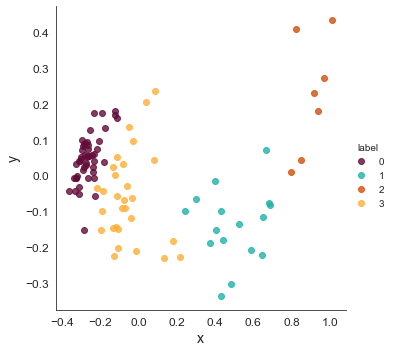

In [16]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#Plotting data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [17]:
#Distributed Stochastic Neighbor Embedding (t-SNE) is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets.
from sklearn.manifold import TSNE 

#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

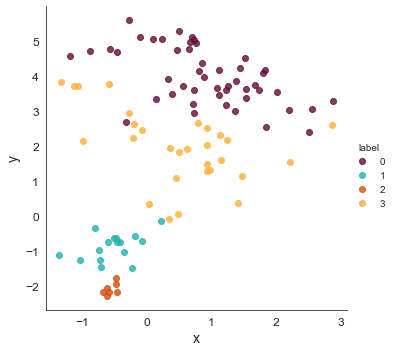

In [18]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [19]:
pca.explained_variance_ratio_

array([0.73646499, 0.09879449])

**The explained variance tells you how much information (variance) can be attributed to each of the principal components.**

# Exploring each of the 4 clusters and see what songs they contain.

In [20]:
songs['label'] = y_kmeans

#Shuffling the dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()

0    48
3    29
1    16
2     7
Name: label, dtype: int64

**Assigning the mood to each cluster at the songs within them and identifying the emotions that I associate with majority of songs in a cluster.**

In [21]:
#MOOD LABEL: CHILL MOOD
songs[songs['label'] == 0].tail(10)

,name,artist,danceability,acousticness,liveness,loudness,speechiness,label
12,Boy With Luv (feat. Halsey),BTS,0.645,0.092300,0.1920,0.894029,0.0965,0
18,Criminal,Britney Spears,0.696,0.048500,0.1830,0.868499,0.0298,0
51,Boyfriend,Justin Bieber,0.717,0.035800,0.1260,0.834031,0.0521,0
39,Say So (feat. Nicki Minaj),Doja Cat,0.856,0.119000,0.4270,0.899591,0.2040,0
49,Make You Mine,PUBLIC,0.606,0.012800,0.1500,0.908529,0.0261,0
91,Thinking Bout You,Ariana Grande,0.505,0.016400,0.1210,0.831131,0.0584,0
67,no tears left to cry,Ariana Grande,0.699,0.040000,0.2940,0.858372,0.0594,0
55,Beauty And A Beat,Justin Bieber,0.602,0.000688,0.0682,0.890511,0.0593,0
69,2002,Anne-Marie,0.697,0.037200,0.1370,0.983218,0.1170,0
57,Company,Justin Bieber,0.590,0.132000,0.0846,0.887183,0.0614,0


In [22]:
#MOOD LABEL: CHEERFUL MOOD
songs[songs['label'] == 1].tail(10)

,name,artist,danceability,acousticness,liveness,loudness,speechiness,label
79,Eastside (with Halsey & Khalid),benny blanco,0.560,0.555,0.1160,0.756585,0.3210,1
48,Memories,Maroon 5,0.764,0.837,0.0822,0.777456,0.0546,1
95,I Don't Care,Ariana Grande,0.585,0.773,0.1530,0.724684,0.0412,1
35,This Town,Niall Horan,0.677,0.712,0.1160,0.717648,0.0308,1
98,Leave Me Lonely,Ariana Grande,0.445,0.599,0.3390,0.765142,0.0312,1
87,My Everything,Ariana Grande,0.540,0.880,0.1310,0.867881,0.0297,1
65,All of Me,John Legend,0.422,0.922,0.1320,0.784349,0.0322,1
0,I Will Always Love You,Whitney Houston,0.306,0.844,0.0839,0.525055,0.0356,1
6,The Night We Met,Lord Huron,0.443,0.969,0.6380,0.667871,0.0441,1
3,Song For Zula,Phosphorescent,0.492,0.729,0.0509,0.727489,0.0349,1


In [23]:
#MOOD LABEL: ENERGETIC MOOD
songs[songs['label'] == 2].tail(10)

,name,artist,danceability,acousticness,liveness,loudness,speechiness,label
46,Kiss the Rain,Yiruma,0.557,0.990,0.1450,0.242702,0.0542,2
44,Kiss The Rain,Yiruma,0.559,0.990,0.1170,0.044975,0.0423,2
45,River Flows in You,Yiruma,0.287,0.968,0.0900,0.203337,0.0541,2
43,River Flows In You,Yiruma,0.314,0.987,0.0802,0.105496,0.0514,2
8,"My Heart Will Go On - Love Theme from ""Titanic""",James Horner,0.157,0.801,0.1260,0.161928,0.0360,2
29,Memories,Ryan L Stewart,0.534,0.969,0.0780,0.342826,0.0353,2
42,Braille,Jan A.P. Kaczmarek,0.183,0.943,0.0931,0.000000,0.0397,2


In [24]:
#MOOD LABEL: ROMANTIC MOOD
songs[songs['label'] == 3].tail(10)

,name,artist,danceability,acousticness,liveness,loudness,speechiness,label
90,Bang Bang,Jessie J,0.707,0.269,0.3770,0.910954,0.0885,3
40,Broken Angel,Arash,0.659,0.264,0.0994,0.835409,0.0252,3
62,"Love Me Like You Do - From ""Fifty Shades Of Grey""",Ellie Goulding,0.262,0.247,0.1250,0.804222,0.0484,3
86,Bang Bang,Ariana Grande,0.703,0.283,0.3960,0.908814,0.0895,3
71,Havana (feat. Young Thug),Camila Cabello,0.765,0.184,0.1320,0.914187,0.0300,3
75,Hurts Like Hell (feat. Offset),Madison Beer,0.704,0.185,0.0948,0.797328,0.1790,3
81,Havana - Remix,Camila Cabello,0.751,0.398,0.1330,0.928307,0.0321,3
10,Love Me Like You,Little Mix,0.785,0.208,0.2850,0.933061,0.0430,3
27,Address It,LPB Poody,0.903,0.109,0.0904,0.739565,0.2680,3
47,Say So,Doja Cat,0.787,0.256,0.0904,0.902586,0.1580,3


**Plotting histogram for each cluster based on their features that we have choosed**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CE59D7370>,
      dtype=object)

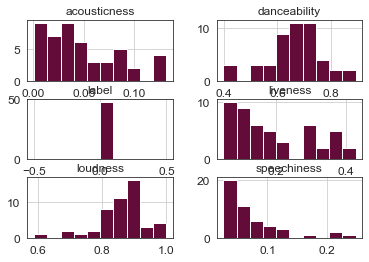

In [25]:
songs[songs['label']==0].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CE5BEEFA0>,
      dtype=object)

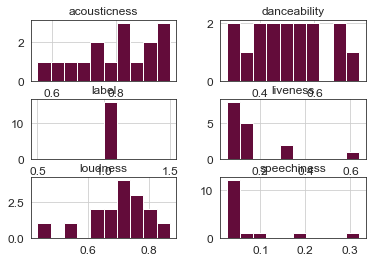

In [26]:
songs[songs['label']==1].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CE5E98BB0>,
      dtype=object)

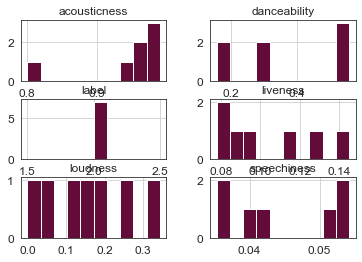

In [27]:
songs[songs['label']==2].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CE82AECA0>,
      dtype=object)

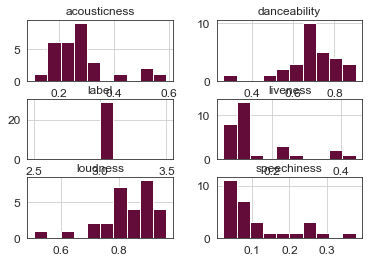

In [28]:
songs[songs['label']==3].hist()

# Using Classifier's: Random Forest, Knn, SVM And MLP Classifier.

*Classifier will handle the missing values and maintain the accuracy of a large proportion of data.*

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = songs_features
y = y_kmeans

#Splitting Dataset into Training Set and Test Set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)

*Confusion matrix: A confusion matrix is a table that is often used to describe the performance of a classification model or “classifier”) on a set of test data for which the true values are known*

In [45]:

def plot_confusion_matrix(y_true, y_pred, classes,normalize=False,title=None,cmap=plt.cm.PuRd):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'
    #Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True',
           xlabel='Predicted')
    
    #Rotating the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

    #Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[16  0  0  0]
 [ 0  4  0  3]
 [ 0  0  1  0]
 [ 0  0  0  9]]


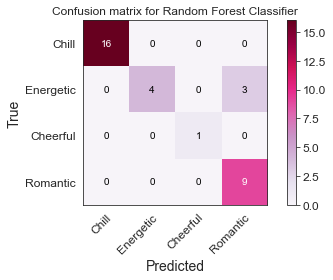

In [46]:
definitions = ['Chill','Energetic','Cheerful','Romantic']
plot_confusion_matrix(y_test, y_pred, classes=definitions,title='Confusion matrix for Random Forest Classifier')

In [47]:
# View a list of the features and their importance scores
features = songs_features.columns
list(zip(songs_features[features], rfc.feature_importances_))

[('danceability', 0.13277464099883984),
 ('acousticness', 0.5450023004232327),
 ('liveness', 0.048974893134428286),
 ('loudness', 0.19797043466014738),
 ('speechiness', 0.07527773078335183)]

In [48]:
#Import Knn model
from sklearn.neighbors import KNeighborsClassifier

#Create a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knn.fit(X_train,y_train)

#Predict the response for test dataset
knn_pred =knn.predict(X_test)

Confusion matrix, without normalization
[[16  0  0  0]
 [ 0  5  1  1]
 [ 0  0  1  0]
 [ 3  0  0  6]]


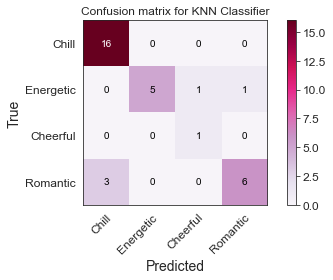

In [49]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,title='Confusion matrix for KNN Classifier')

In [50]:
#Import SVM model
from sklearn import svm

#Create a SVM Classifier
svm = svm.SVC(kernel="linear") 

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm.predict(X_test)

Confusion matrix, without normalization
[[16  0  0  0]
 [ 0  6  0  1]
 [ 0  0  1  0]
 [ 8  0  0  1]]


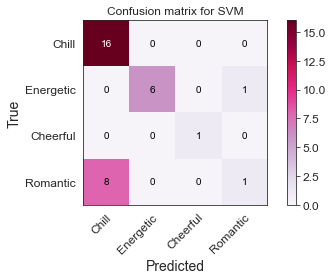

In [51]:
plot_confusion_matrix(y_test, svm_pred, classes=definitions,title='Confusion matrix for SVM')

In [52]:
#Import MLP model
from sklearn.neural_network import MLPClassifier

#Create a MLP Classifier
mlp = MLPClassifier()

#Train the model using the training sets
mlp.fit(X_train, y_train)

#Predict the response for test dataset
mlp_pred = mlp.predict(X_test)

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion matrix, without normalization
[[16  0  0  0]
 [ 0  5  0  2]
 [ 0  0  1  0]
 [ 8  0  0  1]]


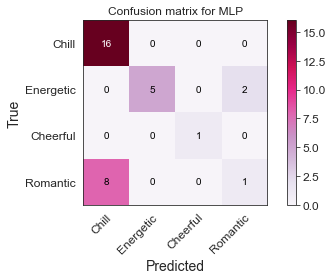

In [53]:
plot_confusion_matrix(y_test, mlp_pred, classes=definitions,title='Confusion matrix for MLP')

In [54]:
print(classification_report(y_test,mlp_pred,target_names=definitions)+'MLP')

              precision    recall  f1-score   support

       Chill       0.67      1.00      0.80        16
   Energetic       1.00      0.71      0.83         7
    Cheerful       1.00      1.00      1.00         1
    Romantic       0.33      0.11      0.17         9

    accuracy                           0.70        33
   macro avg       0.75      0.71      0.70        33
weighted avg       0.66      0.70      0.64        33
MLP


In [55]:
print(classification_report(y_test,svm_pred,target_names=definitions)+'SVM')

              precision    recall  f1-score   support

       Chill       0.67      1.00      0.80        16
   Energetic       1.00      0.86      0.92         7
    Cheerful       1.00      1.00      1.00         1
    Romantic       0.50      0.11      0.18         9

    accuracy                           0.73        33
   macro avg       0.79      0.74      0.73        33
weighted avg       0.70      0.73      0.66        33
SVM


In [56]:
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

              precision    recall  f1-score   support

       Chill       0.84      1.00      0.91        16
   Energetic       1.00      0.71      0.83         7
    Cheerful       0.50      1.00      0.67         1
    Romantic       0.86      0.67      0.75         9

    accuracy                           0.85        33
   macro avg       0.80      0.85      0.79        33
weighted avg       0.87      0.85      0.84        33
KNN


In [57]:
print(classification_report(y_test,y_pred,target_names=definitions)+'RF')

              precision    recall  f1-score   support

       Chill       1.00      1.00      1.00        16
   Energetic       1.00      0.57      0.73         7
    Cheerful       1.00      1.00      1.00         1
    Romantic       0.75      1.00      0.86         9

    accuracy                           0.91        33
   macro avg       0.94      0.89      0.90        33
weighted avg       0.93      0.91      0.90        33
RF
